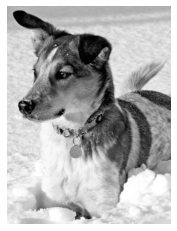

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [12, 6]

A = imread(os.path.join('dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

%matplotlib inline 
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [2]:
A.shape

(2000, 1500, 3)

In [3]:
X.shape

(2000, 1500)

In [4]:
X 
# 원래는 정수가 저장이 되어있는데 평균 내서 이런거

array([[175.        , 174.33333333, 171.33333333, ..., 175.33333333,
        175.        , 172.        ],
       [171.33333333, 171.33333333, 172.33333333, ..., 175.66666667,
        175.        , 172.        ],
       [174.        , 176.        , 178.        , ..., 174.66666667,
        174.33333333, 172.33333333],
       ...,
       [246.        , 246.        , 246.        , ..., 215.33333333,
        216.33333333, 216.66666667],
       [247.        , 246.        , 246.        , ..., 214.33333333,
        215.33333333, 215.66666667],
       [247.        , 246.        , 246.        , ..., 215.33333333,
        214.66666667, 215.66666667]])

In [5]:
U, S, VT = np.linalg.svd(X,full_matrices=False)

In [6]:
U.shape

(2000, 1500)

In [7]:
S.shape

(1500,)

In [8]:
VT.shape

(1500, 1500)

In [9]:
S

array([2.97619391e+05, 6.13288052e+04, 4.79235274e+04, ...,
       4.86742144e+00, 4.70635876e+00, 4.64139913e+00])

In [10]:
S=np.diag(S)
S.shape

(1500, 1500)

In [11]:
S

array([[2.97619391e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.13288052e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.79235274e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.86742144e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.70635876e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.64139913e+00]])

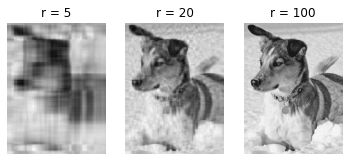

In [12]:
# U, S, VT = np.linalg.svd(X,full_matrices=False)
# S = np.diag(S)

j = 1
for r in (5, 20, 100):
    plt.subplot(1, 3, j)
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    j += 1
plt.show()

In [13]:
np.diag(S)

array([2.97619391e+05, 6.13288052e+04, 4.79235274e+04, ...,
       4.86742144e+00, 4.70635876e+00, 4.64139913e+00])

In [14]:
np.diag(S).shape

(1500,)

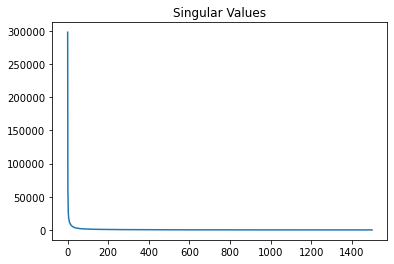

In [15]:
plt.figure(1)
plt.plot(np.diag(S))
plt.title('Singular Values')
plt.show()
# 총 1500개의 값, x축은 각각의 값, y는 실제의 값
# 제일 큰게 앞에 있는데 이게 제일 중요 뒤에건 무시해도 괜찮


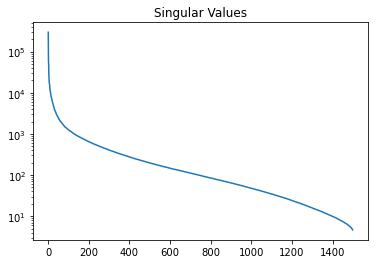

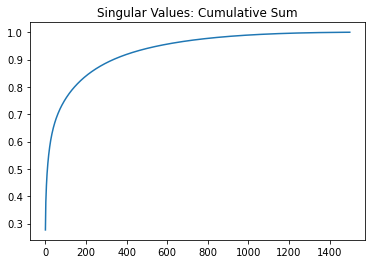

In [16]:
plt.figure(1)
plt.semilogy(np.diag(S)) #앞에꺼 값이 잘 안보여서 로그 씌운거
plt.title('Singular Values')
plt.show()
#  100개만 이용해도 충분히 그림을 복원할 수 있다. 

# 모두 더한 총합
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()